following the https://thecleverprogrammer.com/2021/10/30/language-detection-with-machine-learning/ tutorial


#Linking collab to drive 

In [ ]:
# drive mount 
from google.colab import drive
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
# drive mount 
import os
import sys 
#os.chdir('/content/drive/My Drive/NLP/Challenge_NLP')
os.chdir('/content/drive/My Drive/POLY/polyIA/Language_identification')

# Librairies

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Prétraitement

In [ ]:
df = pd.read_csv('./data_participant/language-identification-datasets.csv')
df_train = df[df['Language'].notna()]
df_test = df[df['Language'].isna()]


In [ ]:
df_train["Language"].nunique()

28

In [ ]:
df_train["Language"].unique()

array(['Turkish', 'Korean', 'Arabic', 'English', 'Swedish', 'Tamil',
       'Greek', 'Dutch', 'Portugese', 'Latin', 'French', 'Persian',
       'Chinese', 'Spanish', 'Estonian', 'Indonesian', 'Romanian', 'Thai',
       'Malayalam', 'Hindi', 'Russian', 'Japanese', 'Italian', 'Pushto',
       'Kannada', 'Urdu', 'German', 'Danish'], dtype=object)

In [ ]:
df_train[df_train['Language']=="Chinese"]

,Text,Language,ID,Language_int
17,芝加哥大学的前身是由美国浸信会建立的老芝加哥大学。该校在年由于财政问题而倒闭。年，在石油大王...,Chinese,25020,12
40,锦州湾机场位于滨海新区机场路号，距离市中心公里，为辽西地区枢纽机场。始建于年，年完工并投入使...,Chinese,16617,12
42,根据年第六次全国人口普查，全市常住人口为人，同第五次全国人口普查相比，十年共增加人，增长，年...,Chinese,15382,12
164,本系列以充滿創意的遊戲方式、有趣的人物角色、獨特的世界觀設定、鉅額的製作經費等特色在遊戲市場...,Chinese,15957,12
168,《蜘蛛侠》获得成功后，邓斯特在独立电影《乞赎的灵魂》（levity）中饰演了一个配角。同年又...,Chinese,30609,12
...,...,...,...,...
24185,城市绿化水平不断提高。到年末，全市园林绿地面积公顷，公园绿地面积公顷，绿化覆盖面积公顷，建成...,Chinese,13696,12
24204,彭家花園小洋房，即小泉阮莊的第七幢別墅，為彭勳武所建，彭勳武妻阮少梅是當地鄉紳阮春泉的小女兒...,Chinese,15708,12
24235,年正月，赴宴归来的张伯驹突患感冒，被送进北大医院，因“级别不够”不能住双人或单人病房，只能和...,Chinese,27199,12
24267,《追风筝的人》中描写阿富汗和塔利班的内容引发了一些相关的争议。英国皇家海军中尉亚历克斯·唐纳...,Chinese,15651,12


### exploration of data

In [ ]:
# checking for null values
print(df_train.isnull().sum())

Text        0
Language    0
ID          0
dtype: int64


In [ ]:
# checking the balencdement of the data
print(df_train["Language"].value_counts())

English       1877
French        1596
Spanish       1418
Russian       1329
Dutch         1226
Arabic        1190
Turkish       1170
Tamil         1156
Hindi          842
Japanese       824
Korean         795
Indonesian     794
Chinese        791
Swedish        788
Urdu           787
Pushto         786
Portugese      785
Latin          784
Persian        784
Thai           770
Estonian       768
Romanian       762
Italian        537
Malayalam      452
German         379
Danish         342
Kannada        301
Greek          293
Name: Language, dtype: int64


We can see there is an imablecement in the dataset. Candidates can think of ways to balance the model using a parametrization in thei model to consider the imbalencement or by working directly on the dataset (ex : data augmentation)

## Baseline Models

In [ ]:

string2int = {}
for i, lang in enumerate(df_train["Language"].unique()):
  string2int[lang] = i

def preprocessing(data,string2int):
  data["Language_int"] = data["Language"].map(string2int)

  # splitting data
  x = np.array(data["Text"])
  y = np.array(data["Language_int"])
  return x,y

x,y = preprocessing(df_train,string2int)



X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

#cv = CountVectorizer()
cv = TfidfVectorizer(ngram_range=(1,3), analyzer='word')
X_train = cv.fit_transform(X_train)
X_test = cv.transform(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Sort by ascending student name
df_train.sort_values(by=["Language"])["Language"].unique()

array(['Arabic', 'Chinese', 'Danish', 'Dutch', 'English', 'Estonian',
       'French', 'German', 'Greek', 'Hindi', 'Indonesian', 'Italian',
       'Japanese', 'Kannada', 'Korean', 'Latin', 'Malayalam', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

In [ ]:
df_train[df_train.index == 3957]

,Text,Language,ID,Language_int
3957,"кто-то занят, вы всегда можете извиниться за б...",Russian,6441,20


# Training and defining model

In [ ]:
model = MultinomialNB()
model.fit(X_train,y_train)
print(model.score(X_test,y_test))

0.89598903836572


In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
y_test_pred

array([ 2, 13,  2, ...,  9,  5,  3])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[345,   0,   0,  23,   0,   0,   0,   1,   0,   0,   3,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0, 261,   0,  17,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 372,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          0,   0],
       [  0,   0,   0, 588,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 245,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0, 358,   0,   0,   0,   0,   1,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

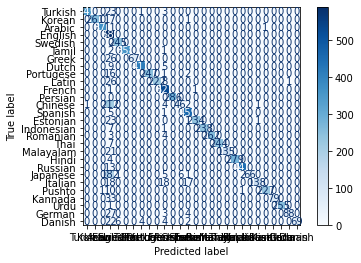

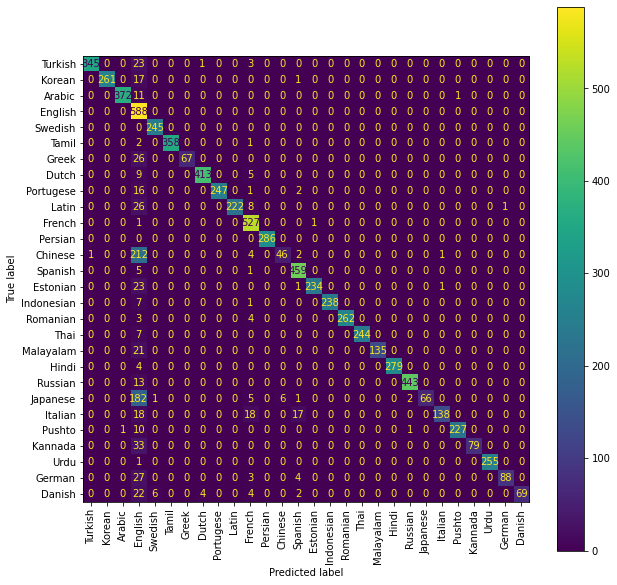

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = df_train["Language"].unique()

disp = ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        y_test,
        display_labels=labels,
        cmap=plt.cm.Blues,
        normalize=None,
    )

fig, ax = plt.subplots(figsize=(10,10))

#ax.set_xticklabels(ax.get_xticks(), rotation = 90)
disp.plot(ax=ax)
#disp.ax_.set_xticklabels(ax.get_ticklabels(), rotation = 90)
for tick in disp.ax_.get_xticklabels():
    tick.set_rotation(90)
fig.show()

In [ ]:

user = input("Enter a Text: ")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a Text: bonjour
[10]


In [ ]:
from sklearn.metrics import f1_score, roc_auc_score
f1_score(y_test, y_test_pred,average='macro')

0.8883083397766026

In [ ]:
y_pred_prob = model.predict_proba(X_test)

In [ ]:
roc_auc_score(y_test, y_pred_prob,multi_class='ovr')

0.9946880515087668

# Prediction and submission file 

In [ ]:
#proprocessing
x_output,y_output = preprocessing(df_test,string2int)
X_output = cv.transform(x_output)

# prediction
y_pred_t = model.predict(X_output)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
int2string = {v: k for k, v in string2int.items()}


df_output = df_test.copy()
df_output["Language"] = y_pred_t
df_output["Language"] = df_output["Language"].map(int2string)
df_output = df_output.drop(["Language_int"], axis=1)

In [ ]:
df_output.head(5)

,Text,Language,ID
24326,[6] Encyclopædia Britannica Inc. şirketi ise a...,Turkish,7823
24327,disculparse.,English,5551
24328,em bon jovi lançou o álbum have a nice day a ...,Portugese,12728
24329,mai fostul președinte egiptean mohamed morsi ...,Romanian,14197
24330,otok škulj är en ö i kroatien den ligger i län...,Swedish,18982


In [ ]:
df_output.to_csv("baseline_soumission_LI_bis.csv", index=False)